### Hi all 🙃

Today we are implementing an auto encoder with Tensorflow and its Keras wrapper. You will see that it is not really difficult

### What is an autoencoder?

Autoencoders are direct propagation neural networks that reconstruct the input signal at the output. Inside they have a hidden layer, which is a code describing the model. Autoencoders are designed in such a way as not to be able to accurately copy the input at the output. Usually they are limited in the dimension of the code (it is smaller than the dimension of the signal) or penalized for activations in the code. The input signal is restored with errors due to encoding losses, but in order to minimize them, the network has to learn to select the most important features.

![texte](https://habrastorage.org/web/cf6/228/613/cf6228613fdc4f8fb819cbd41bb677eb.png)

### About application

By itself, the ability of autoencoders to compress data is rarely used, since they usually work worse than manually written algorithms for specific data types like sounds or images. And it is also critically important for them that the data belong to the general population on which the network was trained. Having trained the autoencoder on numbers, it cannot be used to encode something else (for example, human faces).

However, autoencoders can be used for pre-training, for example, when there is a classification task, and there are too few marked pairs. Or to lower the dimension in the data for subsequent visualization. Or when you just need to learn to distinguish the useful properties of the input signal.

Moreover, some of their developments (which will also be discussed later), such as the variational autoencoder (VAE), as well as its combination with competing generative networks (GAN), give very interesting results and are now at the forefront of the science of generative models.

### Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
# мнист это стандартный датасет для распознавания цифр я его решал в универе :) просто потерял и там было на шарпе...
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

### Data preparation

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

### Build our model

In [7]:
input_image = Input((28, 28, 1))
x = Flatten()(input_image)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
encoded = Dense(49, activation="relu")(x)

d = Dense(64, activation="relu")(encoded)
d = Dense(28*28, activation="sigmoid")(d)
decoded = Reshape((28, 28, 1))(d)

autoencoder = keras.Model(input_image, decoded, name="autoencoder")
autoencoder.compile(optimizer="adam", loss="mean_squared_error")

### Fiting

In [4]:
batch_size = 100

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0441
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0206
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0164
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0145
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0129
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0119
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0112
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0107
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0102
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0098
Epoch 11/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0095
Epoch 12/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 13/20
600/600 [====

### Let's visualize the result

1/1 [==============================] - 0s 85ms/step


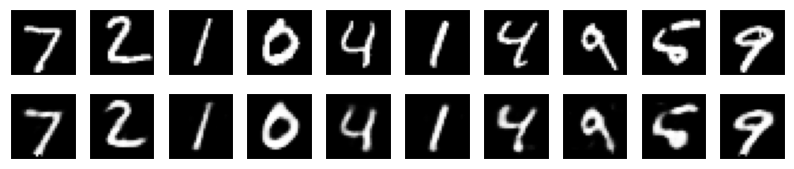

In [5]:
num =  10

images = x_test[:num]
decoded_images = autoencoder.predict(x_test[:num], batch_size=num)

plt.figure(figsize=(num, 2))
for i in range(num):
    ax = plt.subplot(2, num, i+1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax2 = plt.subplot(2, num, i+num+1)
    plt.imshow(decoded_images[i].squeeze(), cmap="gray")
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)